# 1. Camera Calibration

This script intends to find the corners of the checkerboard using the OpenCv method findChessboardCorners.\
We also create 3D points to correspond to the 2D points from the chessboard.

**Import the libraries**

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import scipy as sp

%matplotlib widget

## Finding the corner of the checkerboard

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
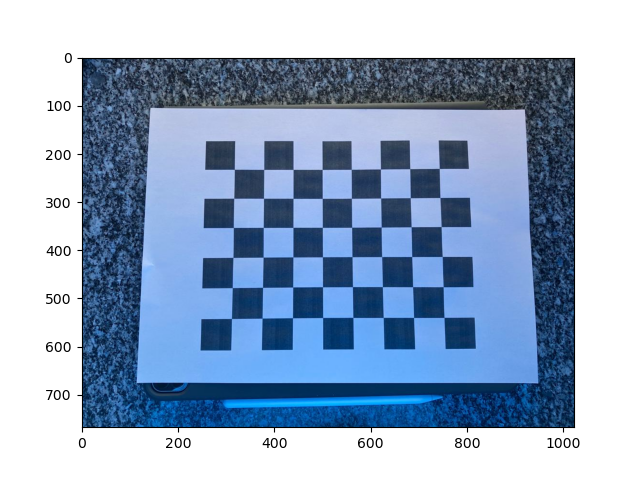

In [2]:
#Import the image
img = cv2.imread("Chessboard_real_1.jpeg")
# convert it to gray scale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)

[[[742.6124  232.03975]]

 [[744.2215  292.34158]]

 [[746.1864  352.55707]]

 [[748.8525  414.17813]]

 [[750.4825  477.45752]]

 [[752.6911  540.6941 ]]

 [[681.2992  232.30281]]

 [[682.15186 292.75607]]

 [[684.201   353.06473]]

 [[685.535   414.6018 ]]

 [[687.22455 477.0953 ]]

 [[689.3221  540.9749 ]]

 [[620.31854 233.09393]]

 [[620.9721  293.07492]]

 [[621.8576  353.43405]]

 [[623.1564  414.97498]]

 [[624.4606  477.48703]]

 [[626.003   540.98065]]

 [[559.8232  233.94124]]

 [[560.08307 293.8024 ]]

 [[560.91156 354.03738]]

 [[561.268   415.1663 ]]

 [[562.0401  477.3733 ]]

 [[563.2444  541.0022 ]]

 [[499.12915 233.83437]]

 [[499.38687 293.9492 ]]

 [[499.71713 354.01096]]

 [[499.96048 415.38153]]

 [[500.24866 477.653  ]]

 [[500.4878  541.56433]]

 [[439.05383 233.9873 ]]

 [[438.94705 293.73227]]

 [[438.68216 354.17172]]

 [[438.64648 415.5313 ]]

 [[438.19775 477.79572]]

 [[437.6763  541.4632 ]]

 [[378.00613 233.91579]]

 [[377.74026 293.6435 ]]

 [[376.9246 

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
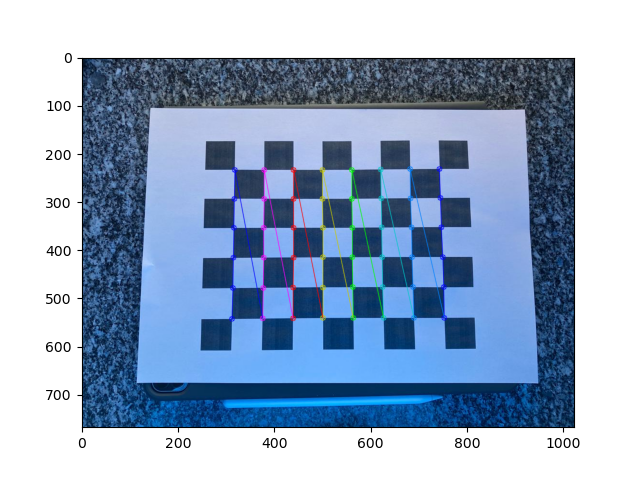

In [4]:
# stop the iteration when specified
# accuracy, epsilon, is reached or
# specified number of iterations are completed.
criteria = (cv2.TERM_CRITERIA_EPS +
            cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Checkerboard patern size
patternsize = (6,8)


# Vector for 3D points
threedpoints = []
 
# Vector for 2D points
twodpoints = []

#3D points real world coordinates
objectp3d = np.zeros((1, patternsize[0]* patternsize[1],3), np.float32)
objectp3d[0, :, :2] = np.mgrid[0:patternsize[0], 0:patternsize[1]].T.reshape(-1, 2)
prev_img_shape = None

#print(objectp3d)

# detect corners
retval, corners= cv2.findChessboardCorners(gray,patternsize,cv2.CALIB_CB_ADAPTIVE_THRESH + cv2.CALIB_CB_FAST_CHECK +cv2.CALIB_CB_NORMALIZE_IMAGE)

print(corners)
if(retval == True):
    threedpoints.append(objectp3d)

    # Refining pixel coordinates or given 2d points.
    corners2 = cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria).reshape(48,2)
    
    twodpoints.append(corners2)
    # Draw and display the corners
    image = cv2.drawChessboardCorners(img,patternsize,corners2,retval)
    #cv2.circle(image,)

    plt.imshow(image)
    plt.show()
    